In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
from collections import Counter
import operator
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [41]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
import logging

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
import gensim
from gensim.models import Word2Vec

In [6]:
train_path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/greyatom_hackaton/NLP Hackathon/data/train.csv'
test_path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/greyatom_hackaton/NLP Hackathon/data/test.csv'

In [7]:
data = pd.read_csv(train_path)

In [8]:
data_test = pd.read_csv(test_path)

In [9]:
data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [10]:
sentiment_distribution = data['sentiment'].value_counts()

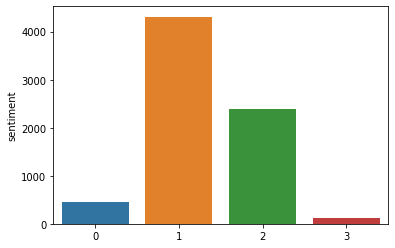

In [11]:
sns.barplot(x=sentiment_distribution.index, y = sentiment_distribution)

In [12]:
data.isna().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [13]:
data['tweet'][data['tweet'].isna()]

1274    NaN
Name: tweet, dtype: object

In [14]:
data.iloc[ 1274 , : ]

tweet_id       6
tweet        NaN
sentiment      1
Name: 1274, dtype: object

In [15]:
data.dropna(inplace=True)

In [16]:
data.drop(columns='tweet_id', inplace=True)

In [17]:
data.head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [18]:
data.iloc[0 , 0]

'#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller'

In [19]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.sentiment.util import *

# from nltk import tokenize

# sid = SentimentIntensityAnalyzer()

# data['sentiment_compound_polarity']=data.tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
# data['sentiment_neutral']=data.tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
# data['sentiment_negative']=data.tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
# data['sentiment_pos']=data.tweet.apply(lambda x:sid.polarity_scores(x)['pos'])

In [20]:
data.head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [21]:
# sentiment_defination = {'Negative' : 0, 'Neutral' : 1, 'Positive' : 2, 'Can\'t Tell' : 3}

# data['sentiment_type'] = data['sentiment_type'].map(sentiment_defination)

# mismatching_sentiments = data[(data['sentiment'] != data['sentiment_type']) & (data['sentiment'] != 3)]

# mismatching_sentiments.head()

# mismatching_sentiments.loc[3, :]

In [22]:
data.corr()

,sentiment
sentiment,1.0


In [23]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('xxxx')
custom = list(stopwords_set)+list(punctuation)+list(set(STOPWORDS))

In [24]:
custom.extend(['rt', 'sxsw', 'mention', 'sxswi', 'link'])

In [25]:
custom.append('link')

In [26]:
'link' in custom

True

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
data['tweet'] = data['tweet'].apply(lambda x : re.sub('[^a-zA-Z]',' ', x))
data['tweet'] = data['tweet'].apply(lambda x : re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
data['tweet'] = data['tweet'].apply(lambda x : re.sub(r'\^[a-zA-Z]\s+', ' ', x))
data['tweet'] = data['tweet'].apply(lambda x : re.sub(r'\s+', ' ', x, flags=re.I))

data['tweet'] = data['tweet'].apply(lambda x : x.lower())


data['tweet'] = [nltk.word_tokenize(x) for x in data['tweet']]

stopwords = set(stopwords.words('english'))

data['tweet'] = data['tweet'].apply(lambda row : [word for word in row if word not in custom])

lemma = WordNetLemmatizer()
data['tweet'] = data['tweet'].apply(lambda x : [lemma.lemmatize(i) for i in x])

data['tweet'] = data['tweet'].apply(lambda x : ' '.join(x))

data.head()

,tweet,sentiment
0,sxswnui apple defining language touch differen...,1
1,learning ab google doodle doodle light funny a...,1
2,one face ex stealing show yr quot apple school...,2
3,iphone app pretty awesome crash every min exte...,0
4,line outside apple store austin waiting new ipad,1


In [29]:
negative = data[data['sentiment'] == 0]
negative.head()

,tweet,sentiment
3,iphone app pretty awesome crash every min exte...,0
24,g iphone hr tweeting rise austin dead need upg...,0
34,went whole day laptop amp used ipad thing miss...,0
50,google lost way caring much business v user psych,0
63,composed tweet acerbic cynical ipad user phone...,0


In [30]:
cant_say = data[data['sentiment'] == 3]

In [31]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    #pos_words = ' '.join([text for text in final['Text'][final['Score'] == 1]])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000,
                       collocations=False
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Negative words


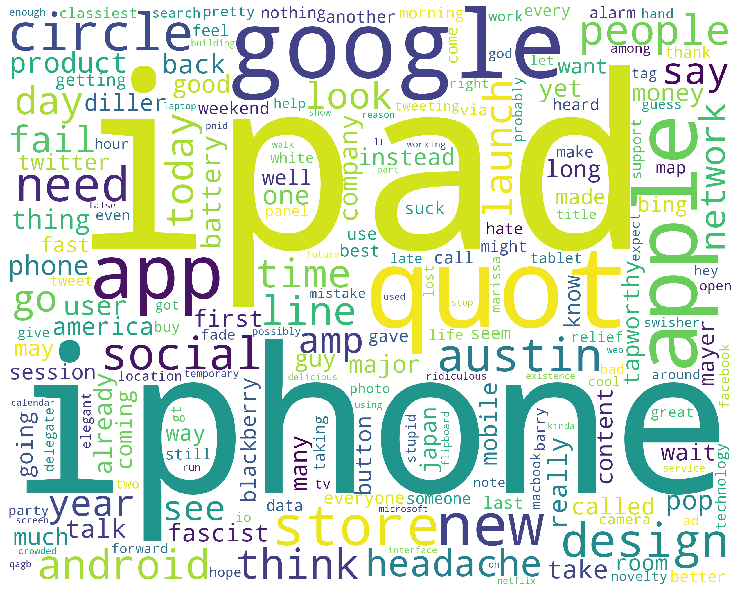

In [32]:
print("Negative words")
wordcloud_draw(negative['tweet'],'white')

Can't Say


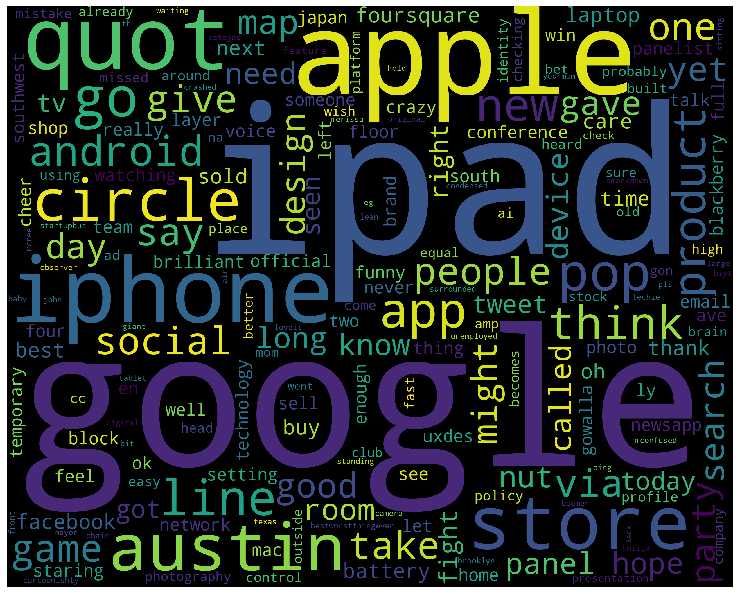

In [33]:
print("Can't Say")
wordcloud_draw(cant_say['tweet'])

In [33]:
def count_word(dataframe):
    BoW = dataframe.apply(lambda x : x.lower())

    BoW = [word_tokenize(i) for i in BoW]
    BoW = [item for sublist in BoW for item in sublist]

    BoW = [x for x in BoW if x not in custom]

    BoW = [lemmatizer.lemmatize(x) for x in BoW]

    BoW_dict = Counter(BoW)

    sorted_d = sorted(BoW_dict.items(), key=operator.itemgetter(1), reverse=True)
    
    print(sorted_d)

In [34]:
count_word(negative['tweet'])

[('ipad', 173), ('iphone', 131), ('quot', 127), ('google', 119), ('apple', 100), ('app', 50), ('store', 38), ('circle', 32), ('new', 31), ('need', 27), ('design', 26), ('austin', 25), ('social', 24), ('apps', 23), ('people', 21), ('think', 20), ('android', 20), ('time', 19), ('line', 19), ('day', 18), ('today', 18), ('launch', 18), ('say', 17), ('go', 17), ('amp', 16), ('fail', 16), ('look', 16), ('headache', 16), ('year', 16), ('network', 15), ('see', 15), ('product', 15), ('user', 14), ('phone', 14), ('battery', 14), ('thing', 13), ('pop', 13), ('one', 13), ('back', 13), ('talk', 12), ('news', 12), ('really', 12), ('take', 12), ('company', 12), ('already', 11), ('yet', 11), ('good', 11), ('fascist', 11), ('america', 11), ('money', 11), ('major', 11), ('much', 10), ('wait', 10), ('guy', 10), ('long', 10), ('called', 10), ('instead', 10), ('tapworthy', 10), ('diller', 10), ('many', 10), ('first', 10), ('content', 10), ('mobile', 10), ('way', 9), ('room', 9), ('going', 9), ('coming', 9)

In [35]:
count_word(cant_say['tweet'])

[('ipad', 44), ('google', 39), ('apple', 30), ('iphone', 26), ('quot', 24), ('store', 17), ('austin', 13), ('circle', 10), ('go', 9), ('pop', 8), ('line', 7), ('product', 6), ('think', 6), ('android', 5), ('people', 5), ('take', 5), ('social', 5), ('give', 5), ('one', 5), ('via', 5), ('game', 5), ('say', 5), ('app', 4), ('search', 4), ('design', 4), ('yet', 4), ('new', 4), ('day', 4), ('party', 4), ('good', 4), ('might', 4), ('map', 4), ('gave', 4), ('long', 3), ('panel', 3), ('room', 3), ('hope', 3), ('device', 3), ('nut', 3), ('need', 3), ('called', 3), ('apps', 3), ('know', 3), ('today', 3), ('fight', 3), ('seen', 3), ('got', 3), ('right', 3), ('tv', 3), ('tweet', 3), ('foursquare', 3), ('time', 3), ('v', 3), ('sold', 3), ('facebook', 3), ('battery', 3), ('best', 3), ('buy', 3), ('care', 3), ('oh', 3), ('laptop', 3), ('next', 3), ('official', 2), ('ly', 2), ('ave', 2), ('enough', 2), ('floor', 2), ('conference', 2), ('email', 2), ('voice', 2), ('funny', 2), ('watching', 2), ('full',

In [36]:
# Extracting word features
def get_words_in_tweets(tweets):
    all_tweet = []
    for words in tweets:
        #print(words)
        all_tweet.extend([words])
    return all_tweet

In [37]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(data['tweet']))

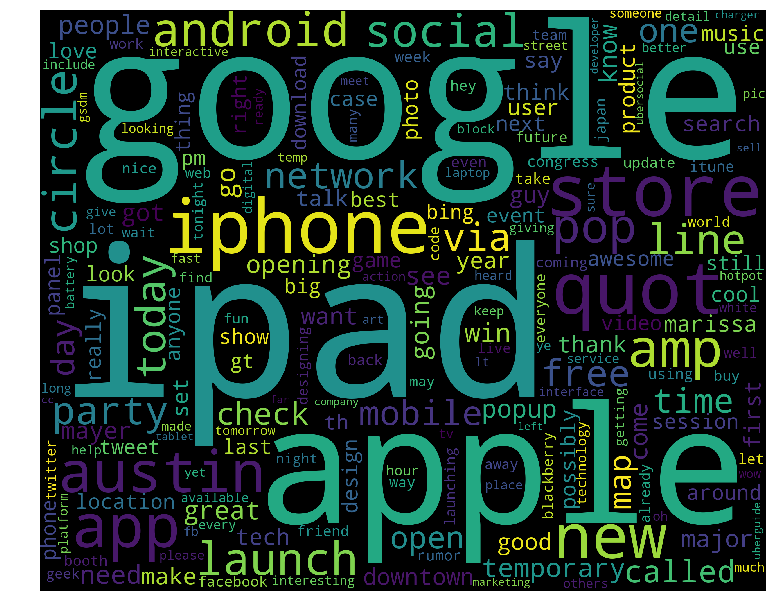

In [38]:
wordcloud_draw(w_features)

In [39]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.sentiment.util import *

# from nltk import tokenize

# sid = SentimentIntensityAnalyzer()

# data['sentiment_compound_polarity']=data.tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
# data['sentiment_neutral']=data.tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
# data['sentiment_negative']=data.tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
# data['sentiment_pos']=data.tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
# data['sentiment_type']=''
# data.loc[data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
# data.loc[data.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
# data.loc[data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
# data.head()

# sentiment_defination = {'Negative': 0, 'Neutral' : 1, 'Positive' : 2}
# data['sentiment_type'] = data['sentiment_type'].map(sentiment_defination)

# sentiment_defination = {'Negative': 0, 'Neutral' : 1, 'Positive' : 2}
# data['sentiment_type'] = data['sentiment_type'].map(sentiment_defination)

In [34]:
X = data['tweet']
y = data['sentiment']

In [44]:
X.shape, y.shape

((7273,), (7273,))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [36]:
import gensim.models.keyedvectors as word2vec
model = word2vec.KeyedVectors.load_word2vec_format('/Users/raisaurabh04/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [37]:
model.init_sims(replace=True)

In [38]:
def word_averaging(model, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in model.vocab:
            mean.append(model.syn0norm[model.vocab[word].index])
            all_words.add(model.vocab[word].index)
    
    if not mean:
        logging.warning('Cannot compute similarity with no inputs %s', words)
        return np.zeros(model.vector_size,)
    
    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

In [39]:
def word_averaging_list(model, text_list):
    return np.vstack([word_averaging(model, review) for review in text_list])

In [63]:
X_train = word_averaging_list(model, X_train)

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [64]:
X_test = word_averaging_list(model, X_test)

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [72]:
data.head()

,tweet,sentiment
0,sxswnui apple defining language touch differen...,1
1,learning ab google doodle doodle light funny a...,1
2,one face ex stealing show yr quot apple school...,2
3,iphone app pretty awesome crash every min exte...,0
4,line outside apple store austin waiting new ipad,1


In [71]:
def classifier_fit(classifer):
    classifer.fit(transform, y)
    
y_pred_nb = classifier_fit(OneVsRestClassifier(LogisticRegression()))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
test_transform = word_averaging_list(model, data_test['tweet'])

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [65]:
classifier = OneVsRestClassifier(LogisticRegression(random_state=0))

classifier.fit(X_train, y_train)
y_pred_log = classifier.predict(X_test)

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
metric_data(y_test, y_pred_log)

Accuracy is  0.5994500458295142
Precision Score is  0.5998205755369967
F1 Score is  0.46102073948942207
Recall Score is  0.5994500458295142
Confusion Matrix is 
[[   0  136    1    0]
 [   0 1287    6    0]
 [   0  694   21    0]
 [   0   37    0    0]]
Classification Report is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.60      1.00      0.75      1293
           2       0.75      0.03      0.06       715
           3       0.00      0.00      0.00        37

    accuracy                           0.60      2182
   macro avg       0.34      0.26      0.20      2182
weighted avg       0.60      0.60      0.46      2182



/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
svc_classifier = SVC(kernel='linear', C=20)

svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

In [70]:
metric_data(y_test, y_pred_svc)

Accuracy is  0.5925756186984418
Precision Score is  0.35114586387584107
F1 Score is  0.44097857552638
Recall Score is  0.5925756186984418
Confusion Matrix is 
[[   0  137    0    0]
 [   0 1293    0    0]
 [   0  715    0    0]
 [   0   37    0    0]]
Classification Report is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.59      1.00      0.74      1293
           2       0.00      0.00      0.00       715
           3       0.00      0.00      0.00        37

    accuracy                           0.59      2182
   macro avg       0.15      0.25      0.19      2182
weighted avg       0.35      0.59      0.44      2182



/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
y_pred_test = classifier.predict(test_transform)
df = pd.DataFrame({'sentiment':np.array(y_pred_test)})

test_dataset = pd.concat([data_test,df],axis=1,sort=False)
test_dataset.head()

test_dataset['sentiment'].value_counts()

# Submission CSV file
submit = test_dataset
submit.to_csv('Final submission_logistic.csv', index = False)

In [49]:
svc_classifier = SVC(kernel='linear', C=20)

In [50]:
svc_classifier.fit(transform, y)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred_test = svc_classifier.predict(test_transform)
df = pd.DataFrame({'sentiment':np.array(y_pred_test)})

test_dataset = pd.concat([data_test,df],axis=1,sort=False)
test_dataset.head()

test_dataset['sentiment'].value_counts()

# Submission CSV file
submit = test_dataset[['tweet_id', 'sentiment']]
submit.to_csv('Final submission_svm.csv', index = False)

In [54]:
test_dataset

,tweet_id,tweet,sentiment
0,7506,Audience Q: What prototyping tools do you use?...,1
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,1
2,247,@mention and here's a pic of you winning your...,1
3,7688,Google Marissa Mayer: mobile phone as a cursor...,1
4,3294,#SXSW Google maps is even cooler than I thought,1
5,6125,RT @mention In front of @mention popup store a...,1
6,6131,RT @mention In my next life I'm coming back as...,1
7,4134,Google celebrating Pi Day in style at #SXSW - ...,1
8,8206,Hmmm is it a bit weird that #sxsw is not tendi...,1
9,8552,@mention to launch 'Circles' later today at #S...,1


In [ ]:
gensim.matutils.unitvec

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [73]:
tfidf_vec = TfidfVectorizer(ngram_range=1)

In [ ]:
X_train = tfidf_vec.fit_transform(X_train)
X_test = tfidf_vec.transform(X_test)

In [ ]:
def classifier_fit(classifer):
    classifer.fit(X_train, y_train)
    y_pred = classifer.predict(X_test)
    return y_pred

In [ ]:
y_pred_nb = classifier_fit(MultinomialNB())

In [66]:
def metric_data(y_true, y_pred):
    '''Method takes expected and actual output as parameters and provides all the relevant classification metrices'''
    #accuracy_score,classification_report,f1_score,confusion_matrix
    acc_score = accuracy_score(y_true, y_pred)
    #tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1 = f1_score(y_true, y_pred, average='weighted')
    prec_score = precision_score(y_true, y_pred, average='weighted')
    rec_score = recall_score(y_true, y_pred, average='weighted')
    classifn_report = classification_report(y_true, y_pred)
    print('Accuracy is ',acc_score)
    print('Precision Score is ', prec_score)
    print('F1 Score is ', f1)
    print('Recall Score is ', rec_score)
    print('Confusion Matrix is ')
    print(confusion_matrix(y_true, y_pred))
    #print(tp, fp)
    #print(fn, tn)
    print('Classification Report is ')
    print(classifn_report)


In [ ]:
metric_data(y_test, y_pred_nb)

In [ ]:
y_pred_tfidf_svc = classifier_fit(SVC(kernel='linear', C=100))

In [ ]:
metric_data(y_test, y_pred_tfidf_svc)

In [ ]:
parameters = {'kernel' : ['linear', 'rbf'], 'C' : [100, 20, 1, 0.1]}

selector = GridSearchCV(estimator=SVC(), scoring='f1_weighted', param_grid=parameters)

In [ ]:
y_pred_tfidf_gs = classifier_fit(selector)

In [ ]:
metric_data(y_test, y_pred_tfidf_gs)

In [ ]:
Counter(y_test)
Counter(y_pred_tfidf_gs)

In [ ]:
selector.best_params_

In [ ]:
parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],
            'max_depth':range(1,3)}

In [ ]:
clf_model = GridSearchCV(estimator=XGBClassifier(), param_grid=parameters, scoring='f1_weighted')

In [ ]:
clf_model.fit(X_train, y_train)

In [ ]:
y_pred_tfidf_xgb = clf_model.predict(X_test)

In [ ]:
metric_data(y_test, y_pred_tfidf_xgb)

In [ ]:
smote = SMOTE(random_state=0)

In [ ]:
X_train_tfidf_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

In [ ]:
parameters = {'kernel' : ['linear', 'rbf'], 'C' : [100, 20, 1, 0.1]}

selector = GridSearchCV(estimator=SVC(), scoring='f1_weighted', param_grid=parameters)

In [ ]:
selector.fit(X_train_tfidf_smote, y_train_smote)

In [ ]:
y_pred_tfidf_smote = selector.predict(X_test)

In [ ]:
metric_data(y_test, y_pred_tfidf_smote)

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=parameter_grid, scoring='f1_weighted')


In [ ]:
grid_search.fit(X_train_tfidf_smote, y_train_smote)



In [ ]:
y_pred_tfidf_smote = grid_search.predict(X_test)

In [ ]:
metric_data(y_test, y_pred_tfidf_smote)

In [ ]:
log_Reg = OneVsRestClassifier(LogisticRegression(random_state=0))

In [ ]:
log_Reg.fit(X_train_tfidf_smote, y_train_smote)

In [ ]:
y_pred_log_reg = log_Reg.predict(X_test)

In [ ]:
metric_data(y_test, y_pred_log_reg)

In [ ]:
import emoji
import re

text = """
Of course, too many emoji characters \
😊 like 😏, #@^!*&#@^# 🤕 helps 🐯 people read 😂aa😂aaa😂a #douchebag :)
"""

text = emoji.demojize(text)
print(text)
text = re.findall(r'(:[^:]*:)', text)
list_emoji = [emoji.emojize(x) for x in text]
print(list_emoji)

In [ ]:
temp = data['tweet'].apply(lambda x: emoji.demojize(x))

In [ ]:
for i in range(1273):
    if not (temp[i] in data['tweet'][i]):
        print('mila')

In [ ]:
temp[1273] in data['tweet'][1273]